# Preprocessing, Classification and Clustering

On this notebook is developed the preprocessing and the application of classification and clustering algorithms to film reviews.

In [1]:
import numpy as np
import pandas as pd
import random
import re
import nltk
from tabulate import tabulate
from bs4 import BeautifulSoup as bs

In [2]:
def extract_lines(corpus):
    X = list()
    y = list()
    for i in range(2, 4381):
        try:
            fname = corpus + str(i) + '.xml'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                content = "".join(content)
                bs_content = bs(content, "lxml")
                review = bs_content.find("review")
                rank = review.get("rank")
                y.append(int(rank))
            
            fname = corpus + str(i) + '.review.pos'
            with open(fname, 'r', encoding = 'latin-1') as rfile:
                content = rfile.readlines()
                review_pos_aux = list()
                              
                for line in content:
                    if line != '\n':
                        line_ls = line.split()
                        review_pos_aux.append(line_ls[1])
                X.append(' '.join(review_pos_aux))
            
        except IOError:
            #print("Could not read file:", fname)
            pass
    
    return X, y

In [3]:
def tokenize_lines_by_words(lines):
    new_lines = list()
    for line in lines:
        new_line = line.lower()
        new_lines.append(nltk.word_tokenize(new_line))
    
    return new_lines

In [4]:
def clean_alphabetic_text_lines(lines):
    new_lines = list()
    for line in lines:
        new_line = list()
        for word in line:
            token = list()
            for c in word:
                #[a-záéíóúñü+$]
                if re.match(r'^[a-záéíóúñü+$]', c):
                    token.append(c)
            token = ''.join(token)
            if token != '':
                new_line.append(token)
        new_lines.append(new_line)
        
    return new_lines

In [5]:
def remove_stop_words(lines):
    stopwords = nltk.corpus.stopwords.words('spanish')
    clean_lines = list()
    for line in lines:
        clean_line = list()
        for word in line:
            if word not in stopwords:
                clean_line.append(word)
        clean_lines.append(' '.join(clean_line))
    
    return clean_lines

In [6]:
def get_X_y(lines):
    X = list()
    y = list()
    for line in lines:
        n = len(line)
        tag = line.pop(n - 1)
        corpus = line
        X.append(corpus)
        y.append(tag)
    return [X, y]

In [7]:
def transform_tag(y):
    new_y = list()
    for i in y:
        if i == 'spam':
            new_i = 1
        else:
            new_i = 0
        new_y.append(new_i)
    return np.array(new_y)

In [8]:
X, y = extract_lines('./../corpusCriticasCine/corpusCriticasCine/')

In [9]:
len(X)

3878

In [10]:
len(y)

3878

In [11]:
tokenized_X = tokenize_lines_by_words(X)

In [12]:
new_X = clean_alphabetic_text_lines(tokenized_X)

In [13]:
clean_X = remove_stop_words(new_X)

In [14]:
data = list(zip(clean_X, y))

In [15]:
random.shuffle(data)

In [16]:
clean_X, y = zip(*data)

In [17]:
clean_X

('martínscorsese siempre haber sentir predilección película mafioso gánsteres policía dirimir diferencia golpe metralleta dejar constancia casino recientemente gangs of newyork ser hombre gustar trama bien elaborar reparar metraje yaque raravez bajar creación hora además antiguo seminarista tener extraordinario habilidad rodear flor nata interpretación consciente scorsese ser director capaz sacar mejor cada infiltrar ser nuevo versión película hongkonesa hacer alguno año si bien conservar espíritu original americano haber dotar toque personal siempre haber caracterizar producción filme narrar historia policía infiltrar mafia mafioso infiltrar policía conllevar ambigüedad moral habitual director hacerver negro ser negro blanco ser blanco policía ser santo mafioso demonio petimetre narcisista lleno maldad dicaprio wahlberg sheen rayar gran nivel mención aparte merecer jacknicholson maestro maestro ser capaz hacer bueno película solo tema musical rollings pinkfloyd interpretar último vanm

In [18]:
y

(5,
 4,
 4,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 4,
 4,
 3,
 1,
 4,
 2,
 4,
 3,
 3,
 5,
 1,
 2,
 1,
 4,
 5,
 3,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 3,
 2,
 2,
 5,
 5,
 5,
 3,
 4,
 3,
 5,
 2,
 2,
 5,
 4,
 3,
 4,
 1,
 2,
 2,
 4,
 5,
 4,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 4,
 4,
 2,
 2,
 3,
 2,
 4,
 4,
 2,
 2,
 5,
 3,
 3,
 5,
 4,
 4,
 4,
 5,
 3,
 5,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 4,
 5,
 4,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 5,
 3,
 5,
 2,
 2,
 3,
 2,
 3,
 3,
 5,
 4,
 3,
 4,
 1,
 3,
 3,
 4,
 2,
 3,
 2,
 4,
 3,
 1,
 4,
 1,
 4,
 3,
 2,
 2,
 1,
 2,
 2,
 5,
 3,
 1,
 2,
 3,
 2,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 5,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 3,
 2,
 4,
 2,
 5,
 3,
 3,
 4,
 3,
 2,
 1,
 2,
 3,
 5,
 2,
 2,
 1,
 3,
 4,
 2,
 4,
 2,
 4,
 5,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 4,
 3,
 2,
 5,
 3,
 4,
 4,
 5,
 3,
 4,
 3,
 2,
 4,
 2,
 4,
 2,
 4,
 3,
 3,
 4,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 5,
 4,
 4,
 2,
 4,
 3,
 3,
 3,
 2,
 1,
 1,
 5,
 2,
 5,
 3,


In [19]:
set(y)

{1, 2, 3, 4, 5}

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
count_vect = CountVectorizer()

In [22]:
X_counts = count_vect.fit_transform(np.array(clean_X))

In [23]:
y = np.array(y)

In [24]:
X_counts.shape

(3878, 44980)

In [25]:
len(y)

3878

In [26]:
tfidf_transformer = TfidfTransformer()

In [27]:
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.2, random_state = 14)

# Logistic Regression

In [29]:
classifier = LogisticRegression()

In [30]:
classifier.fit(X_train, y_train)

LogisticRegression()

### Prediction of training data

In [31]:
y_pred = classifier.predict(X_train)

In [32]:
classifier.score(X_train, y_train)

0.899097356544165

In [33]:
print(metrics.confusion_matrix(y_train, y_pred))

[[ 164   83   38    4    0]
 [   0  711   28    4    0]
 [   0    1 1011    1    0]
 [   0    2   55  642    0]
 [   0    4   66   27  261]]


In [34]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.57      0.72       289
           2       0.89      0.96      0.92       743
           3       0.84      1.00      0.91      1013
           4       0.95      0.92      0.93       699
           5       1.00      0.73      0.84       358

    accuracy                           0.90      3102
   macro avg       0.94      0.83      0.87      3102
weighted avg       0.91      0.90      0.89      3102



### Prediction of test data

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
classifier.score(X_test, y_test)

0.3904639175257732

In [37]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  4  41  16   1   0]
 [  1  60 110   9   0]
 [  0  24 177  39   0]
 [  0   7 125  56   3]
 [  0   9  54  34   6]]


In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.06      0.12        62
           2       0.43      0.33      0.37       180
           3       0.37      0.74      0.49       240
           4       0.40      0.29      0.34       191
           5       0.67      0.06      0.11       103

    accuracy                           0.39       776
   macro avg       0.53      0.30      0.29       776
weighted avg       0.46      0.39      0.35       776



# Multinomial NB

In [39]:
classifier = MultinomialNB()

In [40]:
classifier.fit(X_train, y_train)

MultinomialNB()

### Prediction of training data

In [41]:
y_pred = classifier.predict(X_train)

In [42]:
classifier.score(X_train, y_train)

0.33236621534493876

In [43]:
print(metrics.confusion_matrix(y_train, y_pred))

[[   1    0  288    0    0]
 [   0   13  730    0    0]
 [   0    0 1013    0    0]
 [   0    0  695    4    0]
 [   0    0  358    0    0]]


In [44]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.00      0.01       289
           2       1.00      0.02      0.03       743
           3       0.33      1.00      0.49      1013
           4       1.00      0.01      0.01       699
           5       0.00      0.00      0.00       358

    accuracy                           0.33      3102
   macro avg       0.67      0.21      0.11      3102
weighted avg       0.67      0.33      0.17      3102



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction of test data

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
classifier.score(X_test, y_test)

0.31056701030927836

In [47]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  0   0  62   0   0]
 [  0   1 179   0   0]
 [  0   0 240   0   0]
 [  0   0 191   0   0]
 [  0   0 103   0   0]]


In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        62
           2       1.00      0.01      0.01       180
           3       0.31      1.00      0.47       240
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       103

    accuracy                           0.31       776
   macro avg       0.26      0.20      0.10       776
weighted avg       0.33      0.31      0.15       776



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-means

In [49]:
classifier = KMeans(n_clusters = 5)

In [50]:
classifier.fit(X_train)

KMeans(n_clusters=5)

In [51]:
data = X_train
sse = dict()
res = list()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    res.append(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print(kmeans.score(X_test))

-727.8163314043134
-725.2501464329686
-723.2004124528994
-722.189746669666
-721.6497609765267
-720.9146621610282
-720.9060356485589
-720.6013392919867
-720.4113383116719


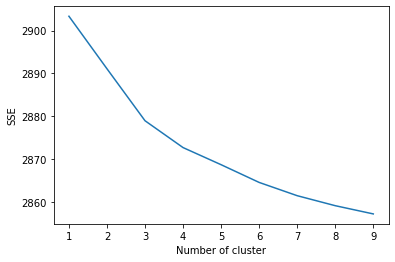

In [52]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Prediction of training data (5 clusters)

In [53]:
y_pred = classifier.predict(X_train)

In [54]:
ls_clusters = sorted(list(set(y_pred)))
dict_clusters = {key: np.sum(y_pred == key) / len(y_pred) for key in ls_clusters}
dict_clusters_sorted = dict(sorted(dict_clusters.items(), key=lambda item: item[1]))
dict_clusters_sorted_keys = list(dict_clusters_sorted.keys())

In [55]:
dict_clusters_sorted

{0: 0.04674403610573823,
 2: 0.09638942617666021,
 4: 0.23243068987749838,
 3: 0.30947775628626695,
 1: 0.31495809155383625}

In [56]:
ls_y = sorted(list(set(y_train)))
dict_y = {key: np.sum(y_train == key) / len(y_train) for key in ls_y}
dict_y_sorted = dict(sorted(dict_y.items(), key=lambda item: item[1]))
dict_y_sorted_keys = list(dict_y_sorted.keys())

In [57]:
dict_y_sorted

{1: 0.09316569954867827,
 5: 0.1154094132817537,
 4: 0.2253384912959381,
 2: 0.23952288845905867,
 3: 0.32656350741457124}

In [58]:
dict_map_clusters_y = {dict_clusters_sorted_keys[i]: dict_y_sorted_keys[i] for i in range(len(dict_y_sorted_keys))}

In [59]:
dict_map_clusters_y

{0: 1, 2: 5, 4: 4, 3: 2, 1: 3}

In [60]:
def reorder_labels(i):
    return dict_map_clusters_y[i]

In [61]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [62]:
classifier.score(X_train)

-2868.844657313318

In [63]:
print(metrics.confusion_matrix(y_train, y_pred_aux))

[[  8 109 117  22  33]
 [ 30 253 272 107  81]
 [ 41 342 301 230  99]
 [ 41 178 199 223  58]
 [ 25  78  88 139  28]]


In [64]:
print(metrics.classification_report(y_train, y_pred_aux))

              precision    recall  f1-score   support

           1       0.06      0.03      0.04       289
           2       0.26      0.34      0.30       743
           3       0.31      0.30      0.30      1013
           4       0.31      0.32      0.31       699
           5       0.09      0.08      0.09       358

    accuracy                           0.26      3102
   macro avg       0.21      0.21      0.21      3102
weighted avg       0.25      0.26      0.25      3102



### Prediction of test data (5 clusters)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
y_pred

array([3, 3, 4, 1, 2, 1, 4, 1, 3, 1, 4, 3, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       0, 1, 1, 4, 4, 1, 3, 3, 0, 3, 4, 4, 2, 3, 4, 1, 4, 3, 3, 1, 0, 1,
       1, 4, 2, 4, 2, 1, 1, 1, 3, 3, 4, 4, 3, 1, 3, 1, 4, 4, 4, 1, 3, 4,
       1, 1, 2, 2, 3, 3, 2, 4, 1, 4, 3, 3, 3, 4, 2, 3, 3, 4, 4, 2, 4, 4,
       1, 3, 0, 1, 1, 1, 1, 3, 1, 4, 3, 1, 3, 1, 2, 2, 3, 4, 1, 1, 1, 1,
       2, 3, 4, 4, 1, 1, 3, 4, 1, 1, 3, 3, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3,
       3, 3, 4, 1, 4, 4, 2, 4, 3, 1, 3, 3, 1, 4, 4, 1, 4, 3, 3, 1, 1, 1,
       4, 1, 4, 2, 3, 3, 3, 1, 3, 1, 1, 4, 1, 1, 0, 3, 4, 1, 4, 3, 3, 3,
       1, 3, 3, 2, 3, 1, 4, 1, 3, 4, 4, 1, 3, 1, 4, 3, 1, 1, 1, 4, 3, 1,
       3, 4, 0, 0, 3, 3, 3, 3, 3, 1, 2, 3, 2, 3, 3, 1, 3, 3, 3, 4, 4, 0,
       3, 4, 4, 4, 3, 3, 3, 1, 4, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 3, 4, 0,
       3, 3, 3, 4, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 2,
       3, 3, 4, 4, 4, 1, 3, 1, 4, 4, 4, 3, 3, 1, 1, 3, 0, 1, 3, 4, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 3, 4, 1, 3, 1, 4, 3, 4,

In [67]:
# Adjustment to labels of data
y_pred_aux = np.array(list(map(reorder_labels, y_pred)))

In [68]:
classifier.score(X_test)

-721.673569461148

In [69]:
print(metrics.confusion_matrix(y_test, y_pred_aux))

[[ 1 23 24  9  5]
 [ 3 72 51 32 22]
 [13 97 62 48 20]
 [ 8 72 52 45 14]
 [ 5 20 28 41  9]]


In [70]:
print(metrics.classification_report(y_test, y_pred_aux))

              precision    recall  f1-score   support

           1       0.03      0.02      0.02        62
           2       0.25      0.40      0.31       180
           3       0.29      0.26      0.27       240
           4       0.26      0.24      0.25       191
           5       0.13      0.09      0.10       103

    accuracy                           0.24       776
   macro avg       0.19      0.20      0.19       776
weighted avg       0.23      0.24      0.23       776

